In [40]:
import geopandas as gpd
import pandas as pd

,from_est_to,Fin_code,eng_name,im_2015,im_2016,im_2017,im_2018,im_2019,rate,geometry_line,dist,geometry,reg_code
0,Kanta-Häme,MK05,Kanta-Häme,103.0,57.0,50.0,45.0,33.0,-212.121212,LINESTRING (2707982.338380874 8607544.46011274...,135.100608,"POLYGON ((2795339.948 8584285.958, 2794878.702...",MK05
1,Päijät-Häme,MK07,Päijät-Häme,147.0,92.0,81.0,70.0,63.0,-133.333333,LINESTRING (2861290.49567076 8675249.859164845...,219.539005,"POLYGON ((2929376.408 8766890.314, 2929589.440...",MK07
2,Satakunta,MK04,Satakunta,144.0,77.0,71.0,40.0,43.0,-234.883721,LINESTRING (2465522.067634026 8749577.53096191...,396.119899,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",MK04
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,64.0,47.0,20.0,37.0,28.0,-128.571429,LINESTRING (2566993.962289686 9037342.19813939...,587.258029,"POLYGON ((2637936.804 9194121.430, 2638090.648...",MK14
4,Ostrobothnia,MK15,Pohjanmaa,92.0,40.0,22.0,32.0,32.0,-187.500000,LINESTRING (2466478.997191412 9123225.89797830...,704.313528,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",MK15


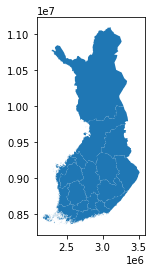

In [41]:
# reading files
# fi
fi_path = r'data\gwr_file\fi_gwr.gpkg'
fi = gpd.read_file(fi_path, driver='GPKG')

fi['reg_code'] = fi['Fin_code']

fi.plot()
fi.head()
# fi.dtypes

In [42]:
# UNEMPLOYMENT RATE
un_path = r'datasets\Finland\unemployment_rate_FIN_2019.csv'
fi_unem = pd.read_csv(un_path, encoding='latin', skiprows=2)

fi_unem['reg_code']= [name[:4] for name in fi_unem['Region 2011']]

fi_unem = fi_unem.rename(columns={'Unemployment rate, %':'unem_%19'})[['reg_code', 'unem_%19']]
fi_unem['reg_code'] = fi_unem['reg_code'].astype(str)

fi_unem.head()

fi = fi.merge(fi_unem, on='reg_code')
fi.head()

,from_est_to,Fin_code,eng_name,im_2015,im_2016,im_2017,im_2018,im_2019,rate,geometry_line,dist,geometry,reg_code,unem_%19
0,Kanta-Häme,MK05,Kanta-Häme,103.0,57.0,50.0,45.0,33.0,-212.121212,LINESTRING (2707982.338380874 8607544.46011274...,135.100608,"POLYGON ((2795339.948 8584285.958, 2794878.702...",MK05,4.4
1,Päijät-Häme,MK07,Päijät-Häme,147.0,92.0,81.0,70.0,63.0,-133.333333,LINESTRING (2861290.49567076 8675249.859164845...,219.539005,"POLYGON ((2929376.408 8766890.314, 2929589.440...",MK07,6.3
2,Satakunta,MK04,Satakunta,144.0,77.0,71.0,40.0,43.0,-234.883721,LINESTRING (2465522.067634026 8749577.53096191...,396.119899,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",MK04,6.5
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,64.0,47.0,20.0,37.0,28.0,-128.571429,LINESTRING (2566993.962289686 9037342.19813939...,587.258029,"POLYGON ((2637936.804 9194121.430, 2638090.648...",MK14,4.4
4,Ostrobothnia,MK15,Pohjanmaa,92.0,40.0,22.0,32.0,32.0,-187.500000,LINESTRING (2466478.997191412 9123225.89797830...,704.313528,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",MK15,4.7


In [43]:
# GDP PER CAPITA
gdp_path = r'datasets\Finland\GDP_perCapita_FIN_2018.csv'
fi_gdp = pd.read_csv(gdp_path, encoding='latin', skiprows=2)

fi_gdp['reg_code']= [name[:4] for name in fi_gdp['Area']]

fi_gdp = fi_gdp.rename(columns={'2018 At current prices, euro':'gdp_eur'})[['reg_code', 'gdp_eur']]

fi_gdp.head()

fi = fi.merge(fi_gdp, on='reg_code')
fi.head()

,from_est_to,Fin_code,eng_name,im_2015,im_2016,im_2017,im_2018,im_2019,rate,geometry_line,dist,geometry,reg_code,unem_%19,gdp_eur
0,Kanta-Häme,MK05,Kanta-Häme,103.0,57.0,50.0,45.0,33.0,-212.121212,LINESTRING (2707982.338380874 8607544.46011274...,135.100608,"POLYGON ((2795339.948 8584285.958, 2794878.702...",MK05,4.4,33522.2
1,Päijät-Häme,MK07,Päijät-Häme,147.0,92.0,81.0,70.0,63.0,-133.333333,LINESTRING (2861290.49567076 8675249.859164845...,219.539005,"POLYGON ((2929376.408 8766890.314, 2929589.440...",MK07,6.3,33399.5
2,Satakunta,MK04,Satakunta,144.0,77.0,71.0,40.0,43.0,-234.883721,LINESTRING (2465522.067634026 8749577.53096191...,396.119899,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",MK04,6.5,37248.4
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,64.0,47.0,20.0,37.0,28.0,-128.571429,LINESTRING (2566993.962289686 9037342.19813939...,587.258029,"POLYGON ((2637936.804 9194121.430, 2638090.648...",MK14,4.4,32977.4
4,Ostrobothnia,MK15,Pohjanmaa,92.0,40.0,22.0,32.0,32.0,-187.500000,LINESTRING (2466478.997191412 9123225.89797830...,704.313528,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",MK15,4.7,40228.8


In [44]:
# POPULATION OVER 65%
pop_path = r'datasets\Finland\age_over65_FIN_2019.csv'
fi_pop = pd.read_csv(pop_path, encoding='latin', skiprows=2)

fi_pop['reg_code']= [name[:4] for name in fi_pop['Area']]

fi_pop = fi_pop.rename(columns={'2019':'pop%65'})[['reg_code', 'pop%65']]

fi_pop.head()

fi = fi.merge(fi_pop, on='reg_code')
fi.head()

,from_est_to,Fin_code,eng_name,im_2015,im_2016,im_2017,im_2018,im_2019,rate,geometry_line,dist,geometry,reg_code,unem_%19,gdp_eur,pop%65
0,Kanta-Häme,MK05,Kanta-Häme,103.0,57.0,50.0,45.0,33.0,-212.121212,LINESTRING (2707982.338380874 8607544.46011274...,135.100608,"POLYGON ((2795339.948 8584285.958, 2794878.702...",MK05,4.4,33522.2,25.3
1,Päijät-Häme,MK07,Päijät-Häme,147.0,92.0,81.0,70.0,63.0,-133.333333,LINESTRING (2861290.49567076 8675249.859164845...,219.539005,"POLYGON ((2929376.408 8766890.314, 2929589.440...",MK07,6.3,33399.5,26.6
2,Satakunta,MK04,Satakunta,144.0,77.0,71.0,40.0,43.0,-234.883721,LINESTRING (2465522.067634026 8749577.53096191...,396.119899,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",MK04,6.5,37248.4,27.2
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,64.0,47.0,20.0,37.0,28.0,-128.571429,LINESTRING (2566993.962289686 9037342.19813939...,587.258029,"POLYGON ((2637936.804 9194121.430, 2638090.648...",MK14,4.4,32977.4,25.3
4,Ostrobothnia,MK15,Pohjanmaa,92.0,40.0,22.0,32.0,32.0,-187.500000,LINESTRING (2466478.997191412 9123225.89797830...,704.313528,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",MK15,4.7,40228.8,23.2


In [45]:
# GENDER
gen_path = r'datasets\Finland\gender_immigrants_FIN_2019.csv'
fi_gen = pd.read_csv(gen_path, encoding='latin', skiprows=2, sep=';')

fi_gen['reg_code']= [name[:4] for name in fi_gen['Region']]

fi_gen = fi_gen[['reg_code', '%male']]

fi_gen['%male'] = fi_gen['%male'].str.replace(',', '.')
fi_gen['%male'] = fi_gen['%male'].astype(float)

fi_gen.head()

fi = fi.merge(fi_gen, on='reg_code')
fi.head()

,from_est_to,Fin_code,eng_name,im_2015,im_2016,im_2017,im_2018,im_2019,rate,geometry_line,dist,geometry,reg_code,unem_%19,gdp_eur,pop%65,%male
0,Kanta-Häme,MK05,Kanta-Häme,103.0,57.0,50.0,45.0,33.0,-212.121212,LINESTRING (2707982.338380874 8607544.46011274...,135.100608,"POLYGON ((2795339.948 8584285.958, 2794878.702...",MK05,4.4,33522.2,25.3,48.6
1,Päijät-Häme,MK07,Päijät-Häme,147.0,92.0,81.0,70.0,63.0,-133.333333,LINESTRING (2861290.49567076 8675249.859164845...,219.539005,"POLYGON ((2929376.408 8766890.314, 2929589.440...",MK07,6.3,33399.5,26.6,51.7
2,Satakunta,MK04,Satakunta,144.0,77.0,71.0,40.0,43.0,-234.883721,LINESTRING (2465522.067634026 8749577.53096191...,396.119899,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",MK04,6.5,37248.4,27.2,50.0
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,64.0,47.0,20.0,37.0,28.0,-128.571429,LINESTRING (2566993.962289686 9037342.19813939...,587.258029,"POLYGON ((2637936.804 9194121.430, 2638090.648...",MK14,4.4,32977.4,25.3,69.0
4,Ostrobothnia,MK15,Pohjanmaa,92.0,40.0,22.0,32.0,32.0,-187.500000,LINESTRING (2466478.997191412 9123225.89797830...,704.313528,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",MK15,4.7,40228.8,23.2,77.8


In [46]:
fi = fi[['from_est_to', 'eng_name', 'reg_code', 'rate', 'im_2019', 'unem_%19', 'gdp_eur', 'dist', 'pop%65',  '%male', 'geometry']]

fi = fi.rename(columns={'rate': 'im%_rate', 'dist':'proxkm' })


,from_est_to,eng_name,reg_code,im%_rate,im_2019,unem_%19,gdp_eur,proxkm,pop%65,%male,geometry
0,Kanta-Häme,Kanta-Häme,MK05,-212.121212,33.0,4.4,33522.2,135.100608,25.3,48.6,"POLYGON ((2795339.948 8584285.958, 2794878.702..."
1,Päijät-Häme,Päijät-Häme,MK07,-133.333333,63.0,6.3,33399.5,219.539005,26.6,51.7,"POLYGON ((2929376.408 8766890.314, 2929589.440..."
2,Satakunta,Satakunta,MK04,-234.883721,43.0,6.5,37248.4,396.119899,27.2,50.0,"MULTIPOLYGON (((2556840.444 8635762.651, 25557..."
3,South Ostrobothnia,Etelä-Pohjanmaa,MK14,-128.571429,28.0,4.4,32977.4,587.258029,25.3,69.0,"POLYGON ((2637936.804 9194121.430, 2638090.648..."
4,Ostrobothnia,Pohjanmaa,MK15,-187.500000,32.0,4.7,40228.8,704.313528,23.2,77.8,"MULTIPOLYGON (((2545536.785 9308791.885, 25460..."


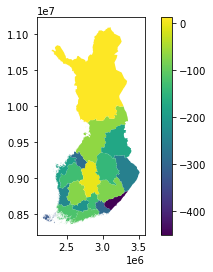

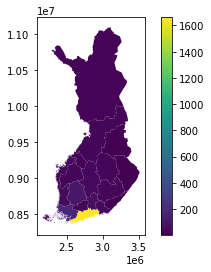

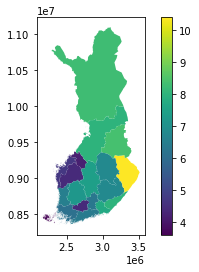

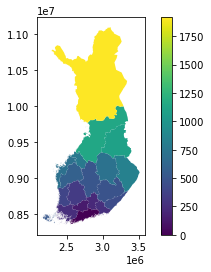

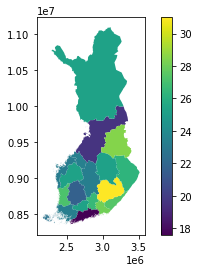

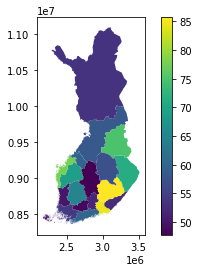

In [47]:
fi.plot(column = 'im%_rate', legend=True)
fi.plot(column = 'im_2019', legend=True)
fi.plot(column = 'unem_%19', legend=True)
fi.plot(column = 'proxkm', legend=True)
fi.plot(column = 'pop%65', legend=True)
fi.plot(column = '%male', legend=True)
fi.head()

In [48]:
from shapely.geometry import Point

fi['POLYID'] = list(range(len(fi)))

for row, item in fi['geometry'].items():
    fi.at[row,'X'] = item.centroid.x 
    fi.at[row,'Y'] = item.centroid.y 

fi.head()

,from_est_to,eng_name,reg_code,im%_rate,im_2019,unem_%19,gdp_eur,proxkm,pop%65,%male,geometry,POLYID,X,Y
0,Kanta-Häme,Kanta-Häme,MK05,-212.121212,33.0,4.4,33522.2,135.100608,25.3,48.6,"POLYGON ((2795339.948 8584285.958, 2794878.702...",0,2.707982e+06,8.607544e+06
1,Päijät-Häme,Päijät-Häme,MK07,-133.333333,63.0,6.3,33399.5,219.539005,26.6,51.7,"POLYGON ((2929376.408 8766890.314, 2929589.440...",1,2.861290e+06,8.675250e+06
2,Satakunta,Satakunta,MK04,-234.883721,43.0,6.5,37248.4,396.119899,27.2,50.0,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",2,2.465522e+06,8.749578e+06
3,South Ostrobothnia,Etelä-Pohjanmaa,MK14,-128.571429,28.0,4.4,32977.4,587.258029,25.3,69.0,"POLYGON ((2637936.804 9194121.430, 2638090.648...",3,2.566994e+06,9.037342e+06
4,Ostrobothnia,Pohjanmaa,MK15,-187.500000,32.0,4.7,40228.8,704.313528,23.2,77.8,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",4,2.466479e+06,9.123226e+06


In [49]:
# SAVING FINAL FILE FOR WGR
fi_gwr_finalpathg= r'data\gwr_file\final\fi_gwr_final.gpkg'
fi_gwr_finalpaths= r'data\gwr_file\final\fi_gwr_final.shp'

fi.to_file(fi_gwr_finalpathg, driver='GPKG')
fi.to_file(fi_gwr_finalpaths)